## Kinematics

$$
\varepsilon_{xx} = 0 \quad \varepsilon_{xy} = 0 \quad \varepsilon_{yy} = \ln(1 + u_{y,y}(y))
$$

## Constitutive relations

\begin{align}
\sigma_{xx} &= \lambda \varepsilon_{yy} \\
\sigma_{xy} &= 0 \\
\sigma_{yy} &= (\lambda+2\mu)\varepsilon_{yy}.
\end{align}

## Mass balance

\begin{equation}
\rho(y) = \frac{\rho_{0}}{1+\varepsilon_{yy}}
\end{equation}

## Momentum balance

\begin{align}
\sigma_{xx,x} + \sigma_{xy,y} &= 0 \\
\sigma_{yx,x} + \sigma_{yy,y} &= \rho g.
\end{align}


## Solution for $\varepsilon_{yy}$

From the second equation for the momentum balance,
\begin{equation}
  (\lambda+2\mu)\frac{d\varepsilon_{yy}}{dy} = \frac{\rho_{0}g}{1+\varepsilon_{yy}}
\end{equation}

Putting $\rho_{0}g/(\lambda+2\mu) = M$, we get a differential equation for $\varepsilon_{yy}$:
\begin{equation}
  (1+\varepsilon_{yy})\varepsilon_{yy}' = \left( \frac{1}{2} (1+\varepsilon_{yy})^{2} \right)' = M
\end{equation}

\begin{equation}
(1+\varepsilon_{yy})^{2} = 2My + C
\end{equation}

Appling the boundary condition that $\sigma_{yy} = 0$ at $y=H$, we know $\varepsilon_{yy} = 0$ at $y=H$, too. So, we get

\begin{equation}
 (1+\varepsilon_{yy})^{2} = 2My + (1-2MH) = 1 - 2M(H-y).
\end{equation}

\begin{equation}
 1+\varepsilon_{yy} = \pm \sqrt{1 - 2M(H-y)}.
\end{equation}


Finally, using the condition that $-1 < \varepsilon_{yy} < 0$ at $y=0$, we get
\begin{equation}
 \varepsilon_{yy} = -1 + \sqrt{1-2M(H-y)} = -1 + \sqrt{1-\frac{2\rho_{0}g}{\lambda+2\mu}(H-y)}.
\end{equation}
 

## Solution for $\sigma_{yy}$ and $\rho$

\begin{equation}
  \sigma_{yy} = (\lambda + 2\mu)\varepsilon_{yy} 
\end{equation}

\begin{equation}
  \rho(y) = \frac{\rho_{0}}{1+\varepsilon_{yy}} 
\end{equation}

## Solution for $u_{y}$

\begin{equation}
  \varepsilon_{yy} = \frac{du_{y}}{dy} = -1 + \sqrt{1-2M(H-y)},
\end{equation}
where $\boldsymbol{\epsilon}$ is the engineering strain.

Solving this ODE, we get
\begin{equation}
  u_{y}(y) = -y + \frac{2}{3}\frac{1}{2M}\left(1-2M(H-y)\right)^{\frac{3}{2}} + D = -y + \frac{1}{3M}\left(1-2M(H-y)\right)^{\frac{3}{2}} + D.
\end{equation}

Applying the boundary condition that $u_{y}(0) = 0$, we get
\begin{equation}
\begin{split}
  u_{y}(y) &= -y + \frac{1}{3M}\left(1-2M(H-y)\right)^{\frac{3}{2}} - \frac{1}{3M}(1-2MH)^{\frac{3}{2}} \\
           &= -y + \frac{1}{3M}\left[ \left(1-2M(H-y)\right)^{\frac{3}{2}} - (1-2MH)^{\frac{3}{2}} \right].
\end{split}
\end{equation}


## New solution for $u_{y}$

\begin{equation}
  \varepsilon_{yy} = \ln \left( 1+ \frac{du_{y}}{dy}\right) = -1 + \sqrt{1-2M(H-y)}.
\end{equation}

Solving this ODE, we get

\begin{equation}
\begin{split}
  u_{y}(y) = -y &+ \frac{1}{M} \Big[ (-1 + \sqrt{1-2M(H-y)})e^{-1+\sqrt{1-2M(H-y)}} \\
  &- (-1 + \sqrt{1-2MH})e^{-1+\sqrt{1-2MH}} \Big].
\end{split}
\end{equation}

In [1]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']
plt.rcParams['lines.linewidth'] = 4
plt.rcParams["font.weight"] = "normal"
plt.rcParams["axes.labelweight"] = "normal"
font1 = {'size': 18, 'weight': 'bold', 'color':  'black'}

In [2]:
model = "7"
rho0 = 2800.0
g = 10.0
lame1 = 200e6
lame2 = mu = 200e6
H = 80.0
M = rho0*g/(lame1 + 2*mu)
# c = rho*g/M
y = np.linspace(0.0, H, 101)

In [3]:
def eyy(y):
    return -1.0 + np.sqrt(1.0-2.0*M*(H-y))
def logeyy(y):
    return np.log(1.0 + eyy(y))
def density(y):
    return rho0/(1.0 + eyy(y))
def density_new(y):
    return rho0/(1.0 + logeyy(y))
def uy(y):
    return -y + ( (1.0-2.0*M*(H-y))**(3.0/2.0) - (1-2.0*M*H)**(3.0/2.0) )/(3.0*M)
def uy_new(y):
    N = 1.0 - 2.0*M*H
    z = -1.0 + np.sqrt(N + 2.0*M*y)
    z0 = -1.0 + np.sqrt(N)
    return -y + (z*np.exp(z) - z0*np.exp(z0))/M

In [4]:
# analytic_uy = uy(y)
# analytic_density = density(y)
# analytic_syy = (lame1 + 2.0*mu)*eyy(y)
analytic_uy = uy_new(y)
analytic_density = density_new(y)
analytic_syy = (lame1 + 2.0*mu)*logeyy(y)

In [5]:
# Run command: time mpirun -np 1 ./laghos -p 1 -fa -dim 2 -rs 0 -tf 100 -m ./data/column_[0080, 0800]m.mesh
# The data acquired from the 'PlotOverLine' filter of Paraview with endpoints (0.0, 0.0, 0.0) and (0.0, 800.0, 0.0)
# The data is saved in the file 'solutions_[H]m.txt'.
laghos_data = np.loadtxt("solutions_{0:04d}m.txt".format(int(H)), skiprows=1, delimiter=",")
laghos_uy = laghos_data[:, 2]
laghos_density = laghos_data[:, 0]
laghos_syy = laghos_data[:, 6]
laghos_y = laghos_data[:, 8]

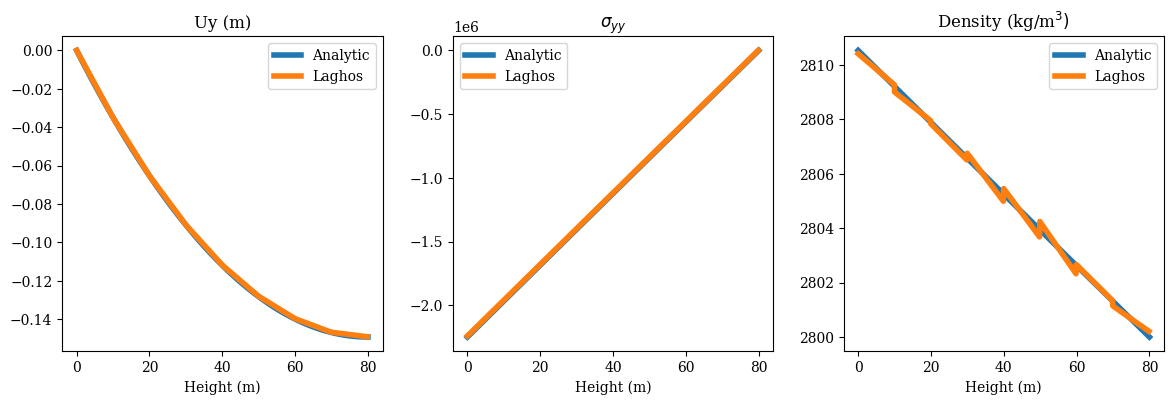

In [6]:
fig, ax = plt.subplots(1,3, figsize=(12,4))
fig.tight_layout(pad=2)
ax[0].plot(y, analytic_uy, label='Analytic')
ax[0].plot(laghos_y, laghos_uy, '-', label='Laghos')
ax[0].set_title(r'Uy (m)')
ax[0].set_xlabel(r'Height (m)')
ax[0].legend()
ax[1].plot(y, analytic_syy, label='Analytic')
ax[1].plot(laghos_y, laghos_syy, '-', label='Laghos')
ax[1].set_title(r"$\sigma_{yy}$")
ax[1].set_xlabel(r'Height (m)')
ax[1].legend()
ax[2].plot(y, analytic_density, label='Analytic')
ax[2].plot(laghos_y, laghos_density, '-', label='Laghos')
ax[2].set_title(r"Density (kg/m$^{3})$")
ax[2].set_xlabel(r'Height (m)')
ax[2].legend()

In [7]:
def compute_relative_error(y, analytic, laghos_y, laghos):
    return np.linalg.norm(analytic[0:-1] - np.interp(y[0:-1], laghos_y, laghos))/np.linalg.norm(analytic[0:-1])

error_uy = compute_relative_error( y, analytic_uy, laghos_y, laghos_uy )
print("Rel. error for uy: {0:.3e}".format(error_uy))

error_syy = compute_relative_error( y, analytic_syy, laghos_y, laghos_syy )
print("Rel. error for syy: {0:.3e}".format(error_syy))

error_density = compute_relative_error( y, analytic_density, laghos_y, laghos_density )
print("Rel. error for density: {0:.3e}".format(error_density))

Rel. error for uy: 4.484e-03
Rel. error for syy: 4.391e-03
Rel. error for density: 3.935e-05
